<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/DR_early_detection_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os

In [ ]:
# List files in my drive
os.listdir('/content/drive/MyDrive/DR fundus photos')

['b. Testing Set', 'a. Training Set']

In [ ]:
# locate all the images in the training set catagory
train = glob.glob('/content/drive/MyDrive/DR fundus photos/a. Training Set/*.jpg')
# find the length of train catagory
print(len(train))
# show id of first five train images
train[:5]

54


['/content/drive/MyDrive/DR fundus photos/a. Training Set/IDRiD_01.jpg',
 '/content/drive/MyDrive/DR fundus photos/a. Training Set/IDRiD_12.jpg',
 '/content/drive/MyDrive/DR fundus photos/a. Training Set/IDRiD_20.jpg',
 '/content/drive/MyDrive/DR fundus photos/a. Training Set/IDRiD_50.jpg',
 '/content/drive/MyDrive/DR fundus photos/a. Training Set/IDRiD_42.jpg']

In [ ]:
# locate all the images in the testing set catagory
test = glob.glob('/content/drive/MyDrive/DR fundus photos/b. Testing Set/*.jpg')
# find the length of testing set catagory
print(len(test))
# show id of first five testing set images
test[:5]

27


['/content/drive/MyDrive/DR fundus photos/b. Testing Set/IDRiD_57.jpg',
 '/content/drive/MyDrive/DR fundus photos/b. Testing Set/IDRiD_70.jpg',
 '/content/drive/MyDrive/DR fundus photos/b. Testing Set/IDRiD_61.jpg',
 '/content/drive/MyDrive/DR fundus photos/b. Testing Set/IDRiD_64.jpg',
 '/content/drive/MyDrive/DR fundus photos/b. Testing Set/IDRiD_68.jpg']

<ipython-input-19-1f6efea1aa5d>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 10, ind+1)


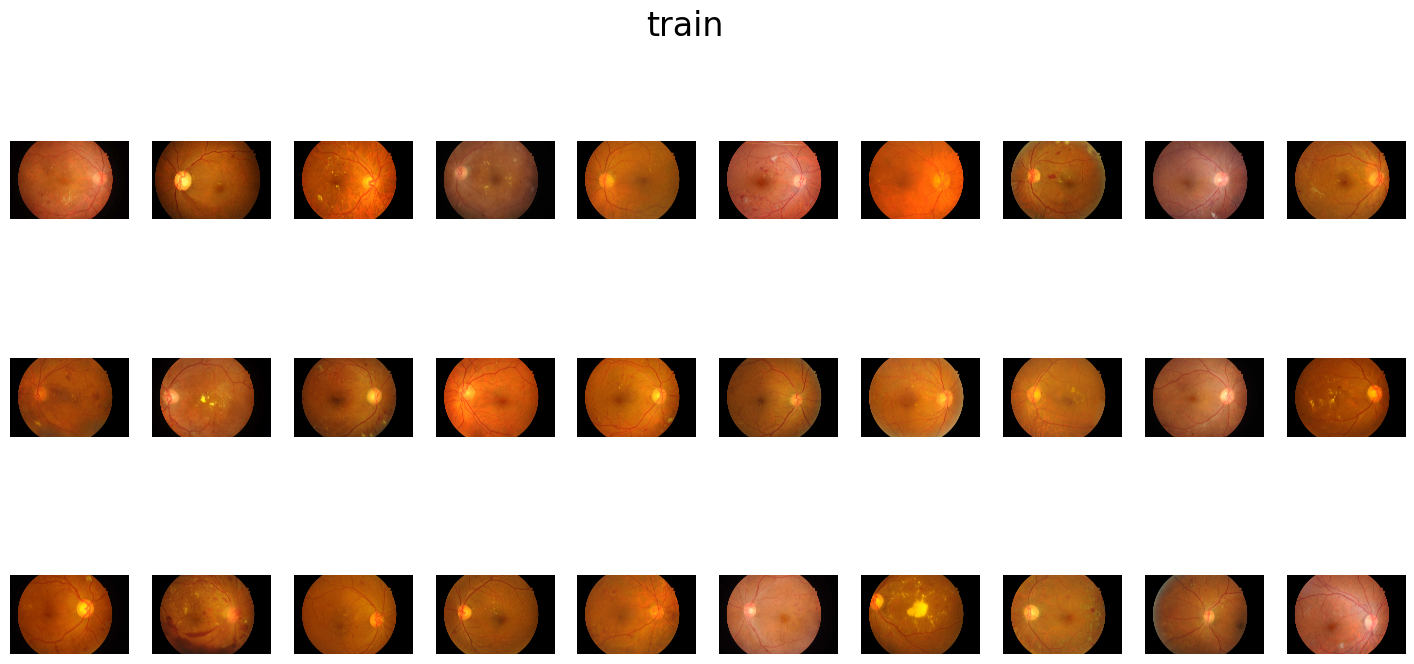

In [ ]:
# IMAGES
fig, ax = plt.subplots(figsize=(18, 8))
fig.suptitle('train', fontsize=24)
for ind, img_src in enumerate(train[:30]):
    plt.subplot(3, 10, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

<ipython-input-20-0d2e6d28bde6>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 10, ind+1)


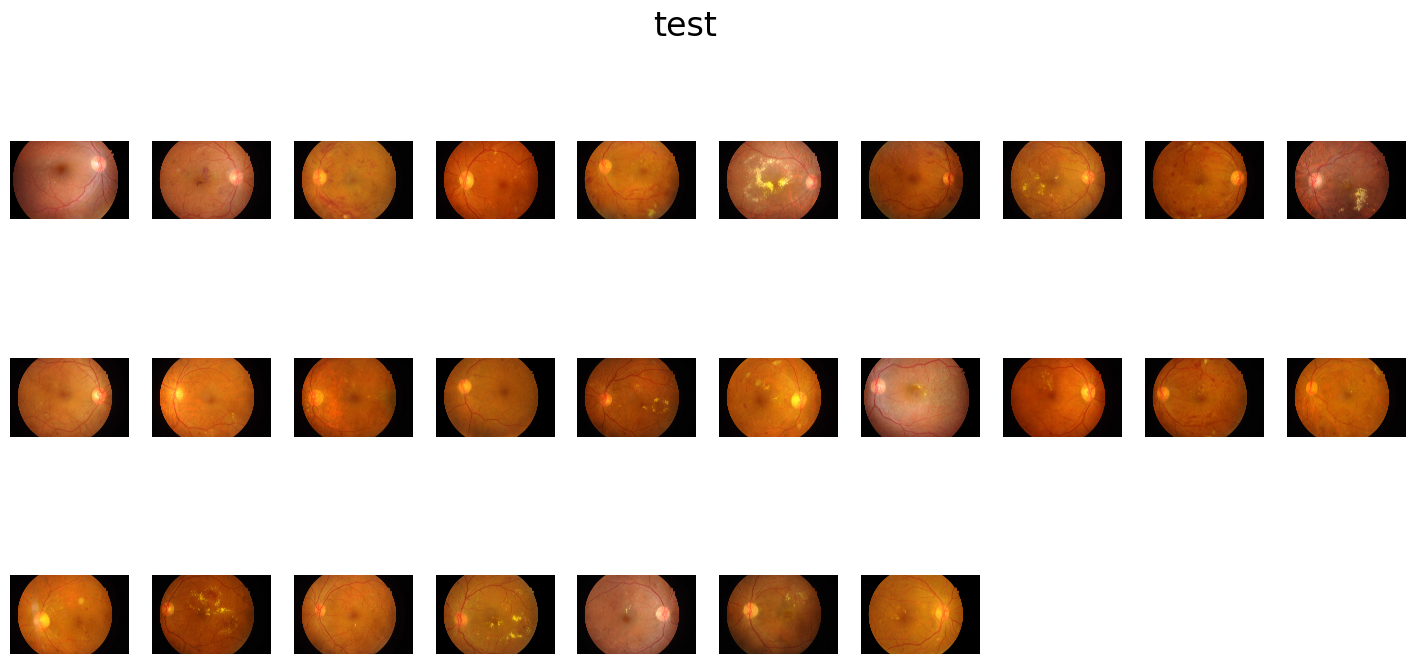

In [ ]:
# IMAGES
fig, ax = plt.subplots(figsize=(18, 8))
fig.suptitle('test', fontsize=24)
for ind, img_src in enumerate(test[:30]):
    plt.subplot(3, 10, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

In [ ]:
# MODEL
# model parameters
# Number of training examples to process
BATCH_SIZE = 5
# setting our training data images with 150 pixels width and 150 pixels height
IMG_SHAPE  = 150
TARGET_SIZE = 64
EPOCHS = 10

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler


In [ ]:
# Model initialization
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

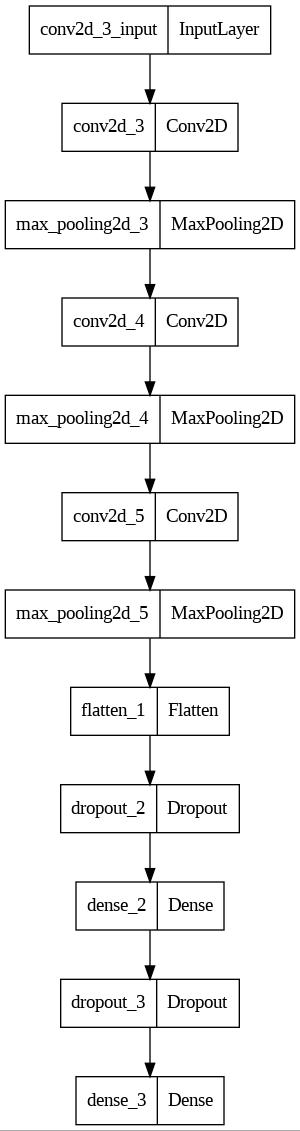

<Figure size 500x1000 with 0 Axes>

In [ ]:
plt.figure(figsize=(5, 10))
plot_model(model, to_file="model.jpg")

In [ ]:
#DATA GENERTOR

datagen = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             validation_split=0.3)
train_data = datagen.flow_from_directory('/content/drive/MyDrive/DR fundus photos',
                                         target_size=(IMG_SHAPE,IMG_SHAPE),
                                         batch_size=BATCH_SIZE,
                                         shuffle=True,
                                         class_mode='binary',
                                         subset='training')
validation_data = datagen.flow_from_directory('/content/drive/MyDrive/DR fundus photos',
                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                              batch_size=BATCH_SIZE,
                                              shuffle=True,
                                              class_mode='binary',
                                              subset='validation')

Found 57 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [ ]:
# Instantiate an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta = 0.01,
                               patience=5)
# Instantiate a model checkpoint callback
model_save = ModelCheckpoint('best_model.hdf5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True)

In [ ]:
# MODEL FIT
history = model.fit(train_data,
                    validation_data=validation_data,
                    epochs=EPOCHS,
                    verbose=1,
                    callbacks=[early_stopping, model_save])

Epoch 1/10
12/12 [==============================] - 12s 950ms/step - loss: 0.7084 - accuracy: 0.5614 - val_loss: 0.6467 - val_accuracy: 0.6667
Epoch 2/10
12/12 [==============================] - 9s 718ms/step - loss: 0.6802 - accuracy: 0.6667 - val_loss: 0.6676 - val_accuracy: 0.6667
Epoch 3/10
12/12 [==============================] - 9s 745ms/step - loss: 0.6522 - accuracy: 0.6667 - val_loss: 0.6263 - val_accuracy: 0.6667
Epoch 4/10
12/12 [==============================] - 11s 948ms/step - loss: 0.6074 - accuracy: 0.6667 - val_loss: 0.5710 - val_accuracy: 0.6667
Epoch 5/10
12/12 [==============================] - 9s 720ms/step - loss: 0.5294 - accuracy: 0.6667 - val_loss: 0.5125 - val_accuracy: 0.6667
Epoch 6/10
12/12 [==============================] - 10s 785ms/step - loss: 0.5499 - accuracy: 0.6667 - val_loss: 0.4585 - val_accuracy: 0.6667
Epoch 7/10
12/12 [==============================] - 10s 863ms/step - loss: 0.5412 - accuracy: 0.6842 - val_loss: 0.4645 - val_accuracy: 0.8333
Ep

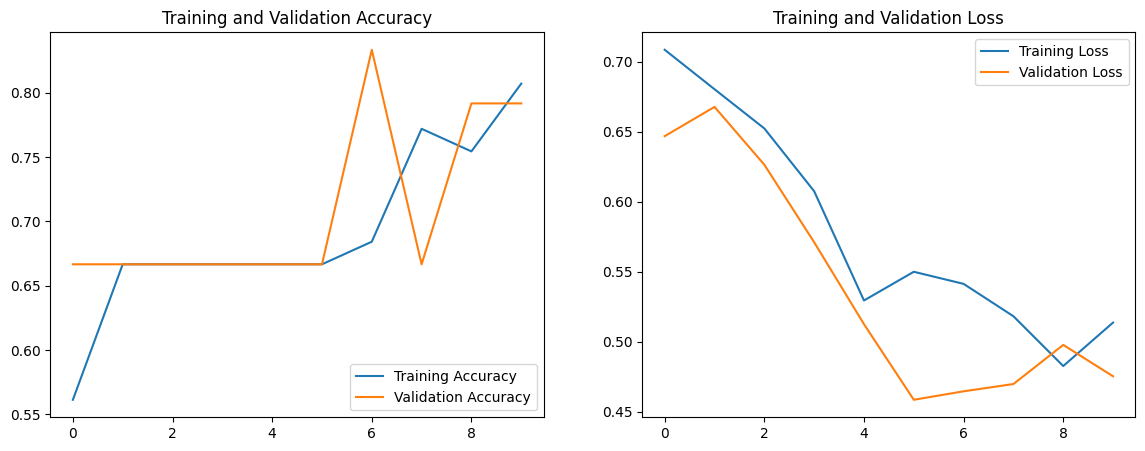

In [ ]:
# PLOT METRICS
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()